# What are Triggers?

Triggers are MySQL programs that are executed automatically in response to an event. They are associated with tables. More specifically, a trigger is invoked in response to events that change the contents of a table, like the `INSERT`, `UPDATE`, and `DELETE` statements. Triggers can be invoked before or after these events take place.

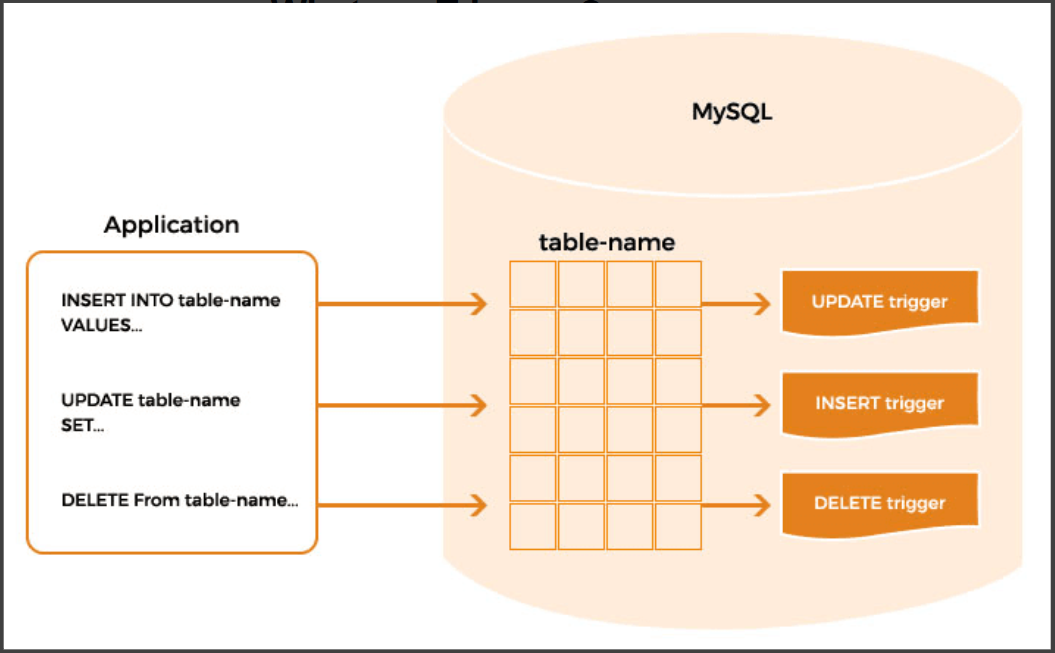

The SQL standard specifies two types of triggers: **row-level triggers** and **statement-level triggers**. 
* The **row-level triggers** are invoked when a row is inserted, updated, or deleted. Say, if a query updates 25 rows, then a row-level trigger will be invoked as many times. \
* The **statement-level triggers** type of triggers are invoked once per statement, even if the statement targets 25 rows.

MySQL only provides support for **row-level triggers**.

**Triggers offer a number of advantages.**
* They prevent invalid DML statements from executing and are used to handle errors from the database layer by ensuring data integrity.
* Triggers provide an alternative to scheduled events. Scheduled events in MySQL are invoked at a specified time, whereas triggers are invoked whenever a DML statement is executed.
* Triggers are also useful for auditing purposes and keeping a log of changes made to a table.

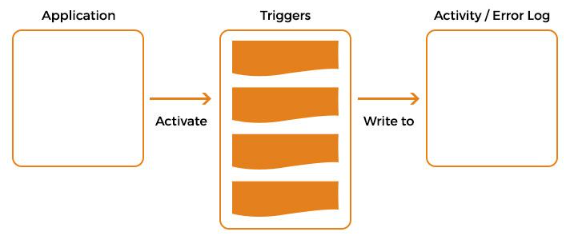

On the flip side, the **limitations of triggers** includes:
* An increased overhead on the MySQL server. 
* They are also difficult to debug because they run automatically at the database layer, and it is not possible to apply breakpoints and see the step-by-step execution.
* In cases where the number of events occurring per second is high, triggers may incur a significant overhead.
* Triggers do not provide all validations that are needed at the application layer.

Triggers can only be associated with three statements: `INSERT`, `UPDATE`, and `DELETE`. If any other statement makes similar changes to the data in the table, the associated triggers will not be executed. For example, instead of `DELETE`, if the `TRUNCATE` statement is used to remove all rows from a table, the trigger associated with the DELETE statement will not be invoked.

# Creating a Trigger

A trigger is associated with an event and runs automatically when the event occurs. 

Triggers can be associated with **6 types of events** in MySQL, which are:
* before data is inserted into the table,
* after data is inserted into the table,
* before the data is updated,
* after the data is updated,
* before the data is deleted, and
* after the data is deleted.

A trigger must be associated with a table. 
* Triggers without a table cannot exist in MySQL.
* Every trigger associated with a table must have a unique name, but the same trigger name can be used with different tables.

The `CREATE TRIGGER` statement is used to create a new trigger. 
* A trigger can be defined before or after an event, and the time should be defined using the keywords `BEFORE` or `AFTER`.
* The events that cause the trigger to execute are specified as `INSERT`, `UPDATE`, or `DELETE`.

**SYNTAX**

```mysql
CREATE TRIGGER trigger_name trigger_time trigger_event

ON table_name

FOR EACH ROW

trigger_body
```

To delete a trigger, the `DROP TRIGGER` statement is used. 
* Since triggers are associated with tables, when tables are dropped, the associated triggers automatically get dropped.
* In case we want to delete a trigger that belongs to another database, the name of the database is specified before the trigger name.

```mysql
DROP TRIGGER [IF EXISTS] [database_name.]trigger_name;
```

---

**EXAMPLE**:

**One of the basic uses of triggers is to validate the user input**. 

Let’s create such a trigger on the Actors table. 
* The purpose of our trigger is to check the value for the **NetWorthInMillions** column before the record is inserted in the **Actors** table.
* In case the value is not specified, or if the user provides a non-negative value by mistake, it will be set the value to zero.

We will define the trigger **NetWorthCheck** as follows:

```mysql
DELIMITER **
CREATE TRIGGER NetWorthCheck
BEFORE INSERT ON Actors
FOR EACH ROW 
 IF  NEW.NetWorthInMillions < 0 OR NEW.NetWorthInMillions IS NULL
THEN SET New.NetWorthInMillions = 0;
END IF;
**
DELIMITER ;
```

* When defining triggers, we specify the trigger time (`BEFORE` or `AFTER`) and the trigger event (`INSERT`, `UPDATE`, or `DELETE`) after the trigger name.
* The keyword `NEW` is used to access the value of the column before the trigger event occurs.

---

To display the triggers in a database `SHOW TRIGGERS` command is used.

```mysql
SHOW TRIGGERS;
```

This query returns a set of columns that:
* list the name of the trigger,
* the event that invokes the trigger,
* the table with which the trigger is associated, the SQL statement of the trigger,
* the time when the trigger is executed,
* the creation time of the trigger,
* the **sql_mode** when the trigger executes,
* the user account that created the trigger, as well as
* the character set and collation information.

The `SHOW TRIGGERS` command can also be used to shortlist triggers by using the `LIKE` clause and specifying a pattern.

---

Now it is time to see how the trigger works. 
* We will insert three rows in the **Actors** table where **NetWorthInMillions** is **positive**, **negative**, and **NULL**. 
* The INSERT operation will automatically cause the trigger to run.

```mysql
INSERT INTO Actors (FirstName, SecondName, DoB, Gender, MaritalStatus,  NetWorthInMillions) VALUES ('Tom', 'Hanks', '1956-07-09', 'Male', 'Married', 350);

INSERT INTO Actors (FirstName, SecondName, DoB, Gender, MaritalStatus, NetWorthInMillions) VALUES ('Young', 'Actor', '2000-03-25', 'Male', 'Single', NULL);

INSERT INTO Actors (FirstName, SecondName, DoB, Gender, MaritalStatus,  NetWorthInMillions) VALUES ('Old', 'Actor', '1960-10-02', 'Male', 'Married', -540);
```

The rows have been successfully inserted in the table, and the associated trigger event has also occurred. 

Let’s query the Actors table to check the values in the **NetWorthInMillions** column:

```mysql
SELECT * FROM Actors;
```

* The trigger was invoked before the rows were inserted into the table. 
* The NULL and negative values in the two `INSERT` queries were changed to **zero**.

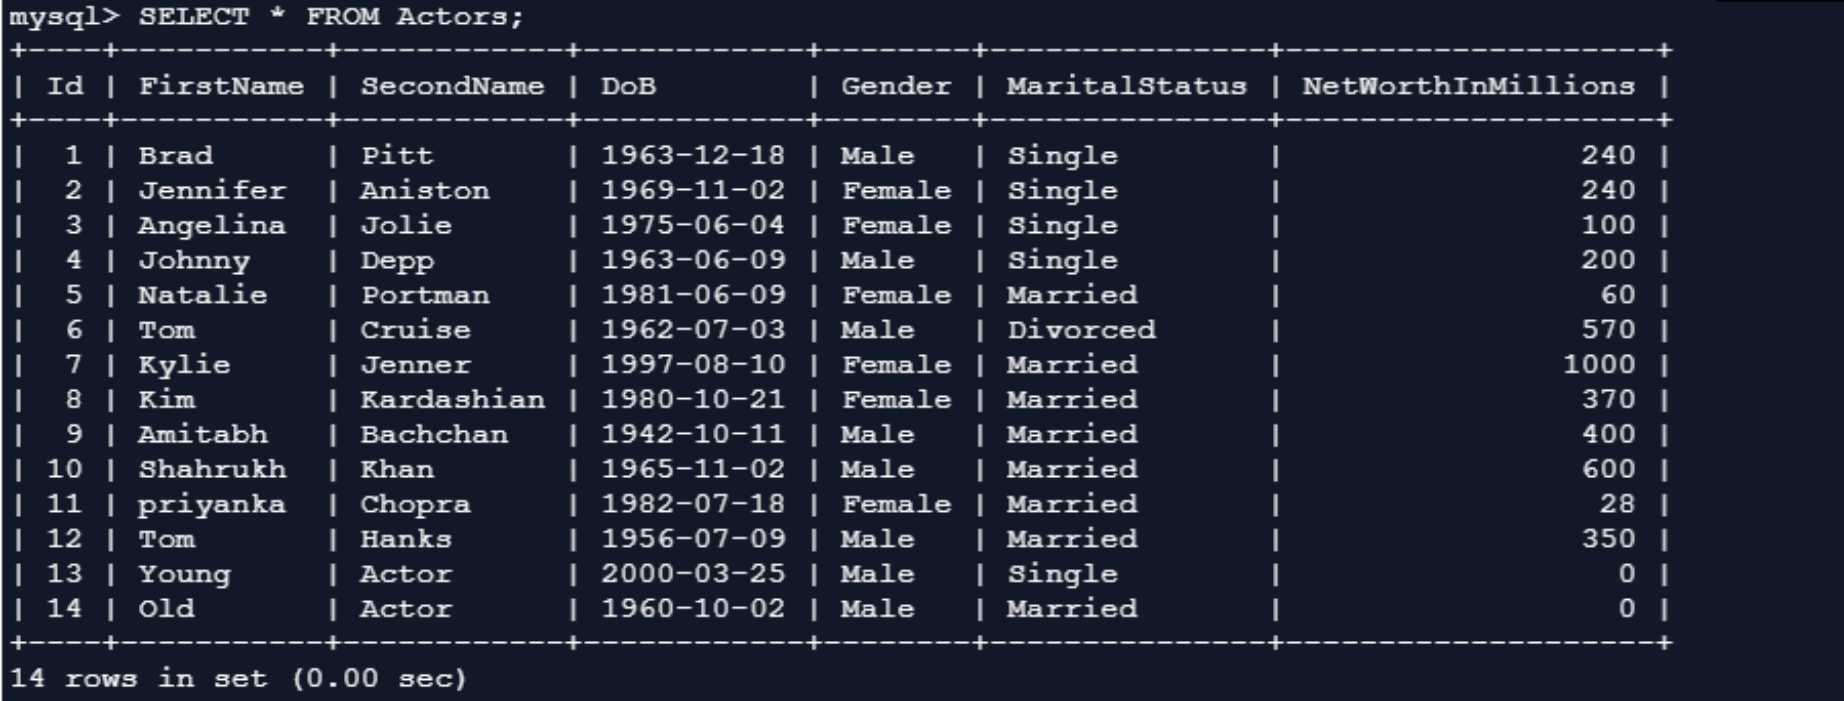

---

To delete the trigger, use the following statement:

```mysql
DROP TRIGGER IF EXISTS NetWorthCheck;
```

* The `IF EXISTS` clause is optional and is used to avoid an error message when a trigger that does not exist is deleted using the `DROP TRIGGER` statement. 
* If this optional clause is used, a note is issued, and the statement is successfully executed even when the trigger does not exist.

# INSERT Triggers

* The insert triggers are fired whenever an `INSERT` operation occurs. 
* They can be executed before or after the insert query is executed.
* In the insert triggers, we can only use the `NEW` keyword to access the new values of a column.
* The `OLD` keyword cannot be used because there are no previous values for an `INSERT` statement.
* The `BEFORE INSERT` trigger can be used for data validation or for maintaining a summary table of another table.
* The `AFTER INSERT` trigger can be used for maintaining an activity log or to copy the values in a table to another table.

**SYNTAX**:

```mysql
CREATE TRIGGER trigger_name [BEFORE | AFTER] INSERT

ON table_name

FOR EACH ROW

trigger_body
```

---

**EXAMPLE: BEFORE INSERT**

We will first cover the `BEFORE INSERT` triggers. 
* Suppose we want to store the **AverageNetWorth** of all actors in our Actors table. 
* This value will change every time a new row is inserted in the table.

We will create a table **NetWorthStats**, to store this value and populate the table as follows:

```mysql
CREATE TABLE NetWorthStats (
AverageNetWorth DECIMAL(10,4)
);

INSERT INTO NetWorthStats(AverageNetWorth) 
Values ((SELECT AVG(NetWorthInMillions) FROM Actors));
```

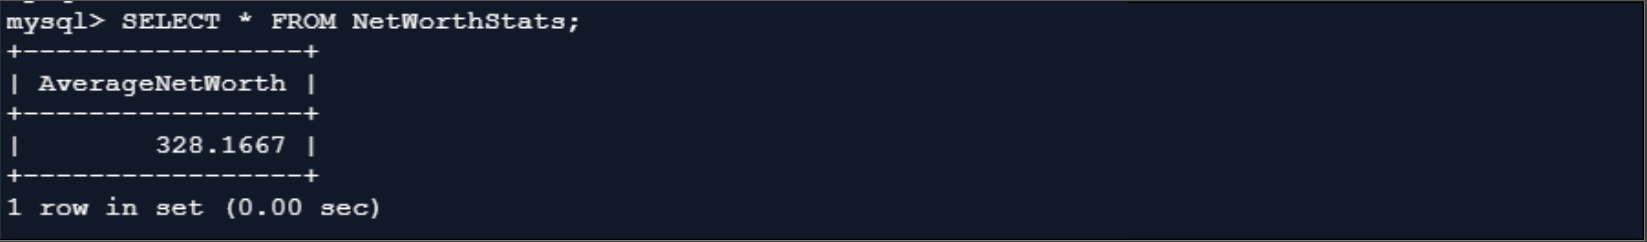

The value **AverageNetWorth** in the above table will be automatically updated before a new actor is added to the **Actors** table.

Next, we will create a trigger **BeforeActorsInsert** for the **NetWorthStats** table as follows:

```mysql
DELIMITER **

CREATE TRIGGER BeforeActorsInsert
BEFORE INSERT ON Actors 
FOR EACH ROW
BEGIN
DECLARE TotalWorth, RowsCount INT;
       
SELECT SUM(NetWorthInMillions) INTO TotalWorth
FROM Actors;

SELECT COUNT(*) INTO RowsCount
FROM Actors;

UPDATE NetWorthStats
SET AverageNetWorth = ((Totalworth + new.NetWorthInMillions) / (RowsCount+1));
  
END **

DELIMITER ;
```

The **BeforeActorsInsert** trigger is associated with the **Actors** table and runs a `BEFORE INSERT` operation. 
* In the trigger body, we first fetch the sum of the **NetWorthInMillions** column in a variable **TotalWorth**.
* Then we find the number of rows in the **Actors** table and save it in a variable **RowsCount**.
* Next, update the **AverageNetWorth** by adding the **NetWorthInMillions** of the new record to the total of all records and then dividing it by the total number of rows to get the result.

We have put all trigger logic between the `BEGIN` and `END` block because the trigger body consists of multiple statements.

To test if our trigger works, we will insert a row in the **Actors** table and then check the **NetWorthStats** table as follows:

```mysql
INSERT INTO Actors (FirstName, SecondName, DoB, Gender, MaritalStatus, NetWorthInMillions) 
VALUES ('Charlize', 'Theron', '1975-08-07', 'Female', 'Single', 130);

SELECT * FROM NetWorthStats;
```

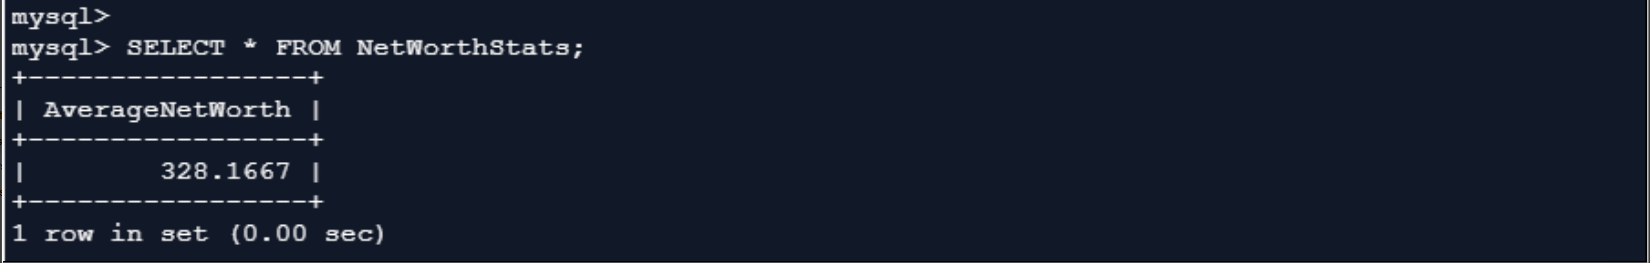

As seen, the value of **AverageNetWorth** has changed from **346.1818** to **328.1667** when a new row is added in the **Actors** table.

* The value in the **NetWorthStats** table can also change in the event of an update or delete operation on the **Actors** table. 
* Hence, we need more triggers to handle those events and update the value of **AverageNetWorth** accordingly.

---

**EXAMPLE: AFTER INSERT**

Now we will discuss the `AFTER INSERT` triggers. Triggers can be used to maintain logs. 

Let us create such a trigger on the **Actors** table. 
* We will begin by creating a table, **ActorsLog**, which will be used to keep track of changes made to the **Actors** table.
* We want to store the **ActorId**, **first** and **last name**, the **time and date** of the action, as well as the **type of event** (insert, update, or delete) that caused a change in the table. 

Execute the following query:

```mysql
CREATE TABLE ActorsLog (
 LogId INT AUTO_INCREMENT PRIMARY KEY,
 ActorId INT NOT NULL,
 FirstName VARCHAR(20),    
 LastName VARCHAR(20),
 DateTime DATETIME DEFAULT NULL,
 Event VARCHAR(50) DEFAULT NULL
);
```

Next, we will define a trigger **AfterActorsInsert**, that will insert a row in the **ActorsLog** table whenever an **INSERT** operation occurs on the **Actors** table.

```mysql
CREATE TRIGGER AfterActorsInsert 
AFTER INSERT ON Actors
FOR EACH ROW 
INSERT INTO ActorsLog
SET ActorId = NEW.Id, 
 FirstName = New.FirstName, 
 LastName = NEW.SecondName, 
 DateTime = NOW(), 
 Event = 'INSERT';
```

Now it is time to see how the trigger works. 

We will insert a row in the **Actors** table, and the **INSERT** operation will automatically cause the trigger to run.

```mysql
INSERT INTO Actors (FirstName, SecondName, DoB, Gender, MaritalStatus, NetWorthInMillions) 
VALUES ('Matt', 'Damon', '1970-10-08', 'Male', 'Married', 160);

SELECT * FROM ActorsLog;
```

The row is successfully inserted in the **Actors** table, and the associated trigger event has also occurred, as can be seen from the **ActorsLog** table:

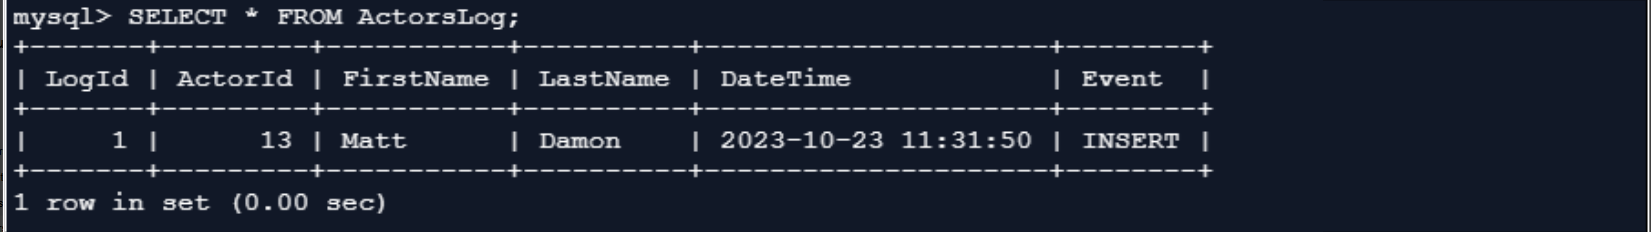

# UPDATE Triggers

*Update triggers for a table are automatically executed when an `UPDATE` is made to the table.
* These triggers can run before or after the table is updated.
* Both the `NEW` and `OLD` keywords can be used as both values of a column are accessible when using update triggers.
* When the trigger runs `BEFORE` the update is performed, the `NEW` value can be updated while the `OLD` value cannot be updated.
* When the trigger runs `AFTER` the update has been performed, we can only access the `NEW` and `OLD` values, but cannot update them.
* Update triggers cannot be made for views. 
* `BEFORE UPDATE` triggers can be used to validate data and make necessary corrections or notify the user before an update is made to the table.
* They can also be used to store the new and old values of a column to maintain an update log.
* `AFTER UPDATE` triggers can also be used to maintain a change log or to update the summary table in the event of an update.

**SYNTAX**:

```mysql
CREATE TRIGGER trigger_name [BEFORE | AFTER] UPDATE

ON table_name

FOR EACH ROW

trigger_body
```

---

**EXAMPLE**:

Let’s create an example of `BEFORE UPDATE` triggers. 
* We will create a trigger on the **DigitalAssets** table that keeps track of changes to the **LastUpdatedOn** column.
* Whenever a row is updated, the trigger will check the query, and if the change is made to the **LastUpdatedOn** column, then a new row is inserted in the **DigitalActivity** table.

Before we define the trigger, let’s create the DigitalActivity table as follows:

```mysql
CREATE TABLE DigitalActivity (
RowID INT AUTO_INCREMENT PRIMARY KEY,
ActorID INT NOT NULL,
Detail VARCHAR(100) NOT NULL,
UpdatedOn TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP
);
```

We intend to store the **ActorID** and information about the previous and new values of **LastUpdatedOn** column as well as the time when the change was made.

Now, we will create the trigger **BeforeDigitalAssetUpdate** as follows:

```mysql
DELIMITER **

CREATE TRIGGER BeforeDigitalAssetUpdate
BEFORE UPDATE
ON DigitalAssets 
FOR EACH ROW
BEGIN
DECLARE errorMessage VARCHAR(255);

IF NEW.LastUpdatedOn < OLD.LastUpdatedOn THEN
SET errorMessage = CONCAT('The new value of LastUpatedOn column: ', 
  NEW.LastUpdatedOn,' cannot be less than the current value: ', 
  OLD.LastUpdatedOn);

SIGNAL SQLSTATE '45000'
SET MESSAGE_TEXT = errorMessage;
END IF;

IF NEW.LastUpdatedOn != OLD.LastUpdatedOn THEN
INSERT into DigitalActivity (ActorId, Detail)
VALUES (New.ActorId, CONCAT('LastUpdate value for ',NEW.AssetType,
       ' is modified from ',OLD.LastUpdatedOn, ' to ', 
       NEW.LastUpdatedOn));   
END IF;
  
END **

DELIMITER ;
```


We are performing two actions in this trigger. First, the value of the timestamp provided in the `UPDATE` query is compared with the value that already exists for that record. If the timestamp provided is less than the old one, then an error message is displayed. This is based on the assumption that as the actors update their digital assets, the timestamp of the new update will always be greater than the previous update. There is a flaw in this logic; assume that the timestamp entered was incorrect and is now being updated to a smaller value. We will ignore that case here and assume that all values in the **LastUpdatedOn** column are correct. The purpose of this trigger is to issue an error message to the user and prevent an incorrect update.

The trigger also performs an `INSERT` into the DigitalActivity table. We first check if the `NEW` timestamp value is different from the `OLD` one. This is done to ensure that the `UPDATE` is made to the **LastUpdatedOn** column and not any other column in the **DigitalAssets** table.

To test the **BeforeDigitalActivityUpdate** trigger, we will perform two `UPDATE` operations as follows:

```mysql
UPDATE DigitalAssets 
SET LastUpdatedOn = '2020-02-15 22:10:45'
WHERE ActorID = 2 AND Assettype = 'Website';

UPDATE DigitalAssets 
SET LastUpdatedOn = '2018-01-15 22:10:45'
WHERE ActorID = 5 AND AssetType = 'Pinterest';

SELECT * FROM DigitalActivity;
```

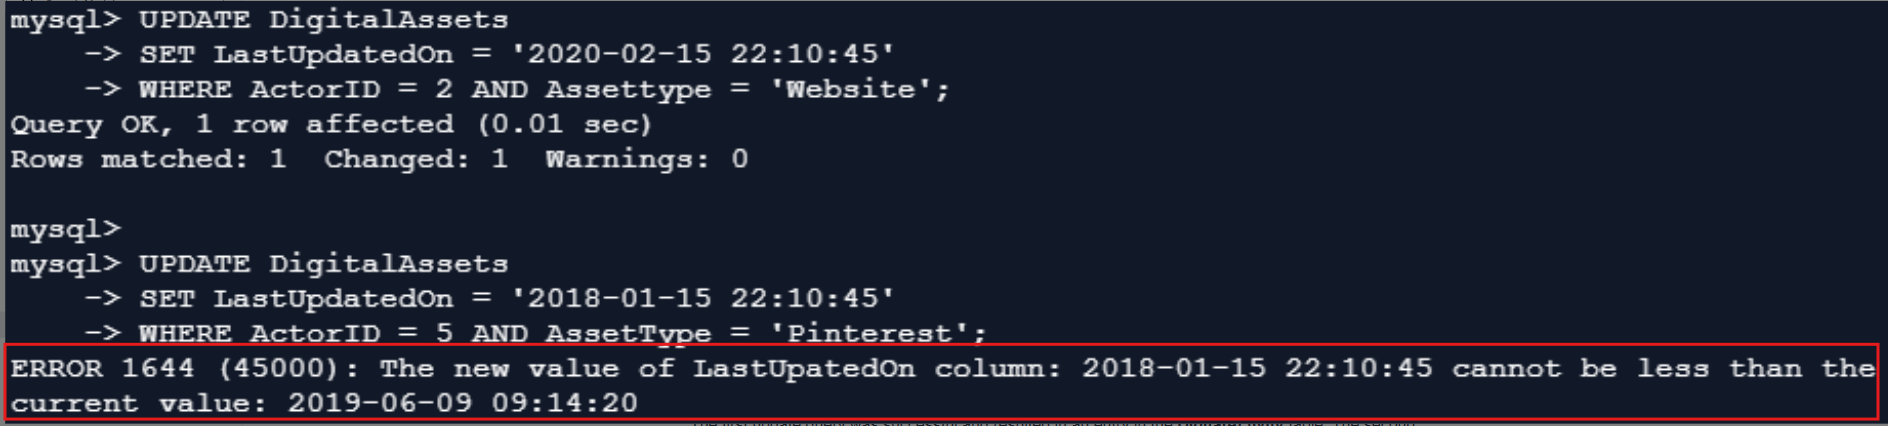

* The first update query was successful and resulted in an entry in the **DigitalActivity** table. 
* The second update query resulted in an error message, and the record was not updated.

We will discuss `AFTER UPDATE` triggers now. 
* In the last lesson, we created the **ActorsLog** table and a summary table **NetWorthStats**, to store the **AverageNetWorth** of all actors in the **Actors** table.
* Whenever a row is updated, we will log this activity in the **ActorsLog** table.
* If the **NetWorthInMillions** column was changed, then the summary table will be updated.

The trigger **AfterActorsUpdate** is defined as follows:

```mysql
DELIMITER **

CREATE TRIGGER AfterActorUpdate
AFTER UPDATE ON Actors 
FOR EACH ROW
BEGIN
DECLARE TotalWorth, RowsCount INT;

INSERT INTO ActorsLog
SET ActorId = NEW.Id, FirstName = New.FirstName, LastName =  NEW.SecondName, DateTime = NOW(), Event = 'UPDATE';

IF NEW.NetWorthInMillions != OLD.NetWorthInMillions THEN
 
SELECT SUM(NetWorthInMillions) INTO TotalWorth
 FROM Actors;

 SELECT COUNT(*) INTO RowsCount
 FROM Actors;

 UPDATE NetWorthStats
 SET AverageNetWorth = ((Totalworth) / (RowsCount));
END IF;
END **

DELIMITER ;
```

* This trigger will perform an `INSERT` operation and update **NetWorthStats** only when the column **NetWorthInMillions** is changed.
* We can access both the previous and new values of the column using OLD and NEW keywords, but we cannot modify them.

To test this trigger, we will update a row of **Actors** table.

```mysql
SELECT * FROM NetWorthStats;

UPDATE Actors
SET NetWorthInMillions = '100'
WHERE Id = 5;

SELECT * FROM NetWorthStats;
SELECT * FROM ActorsLog;
```
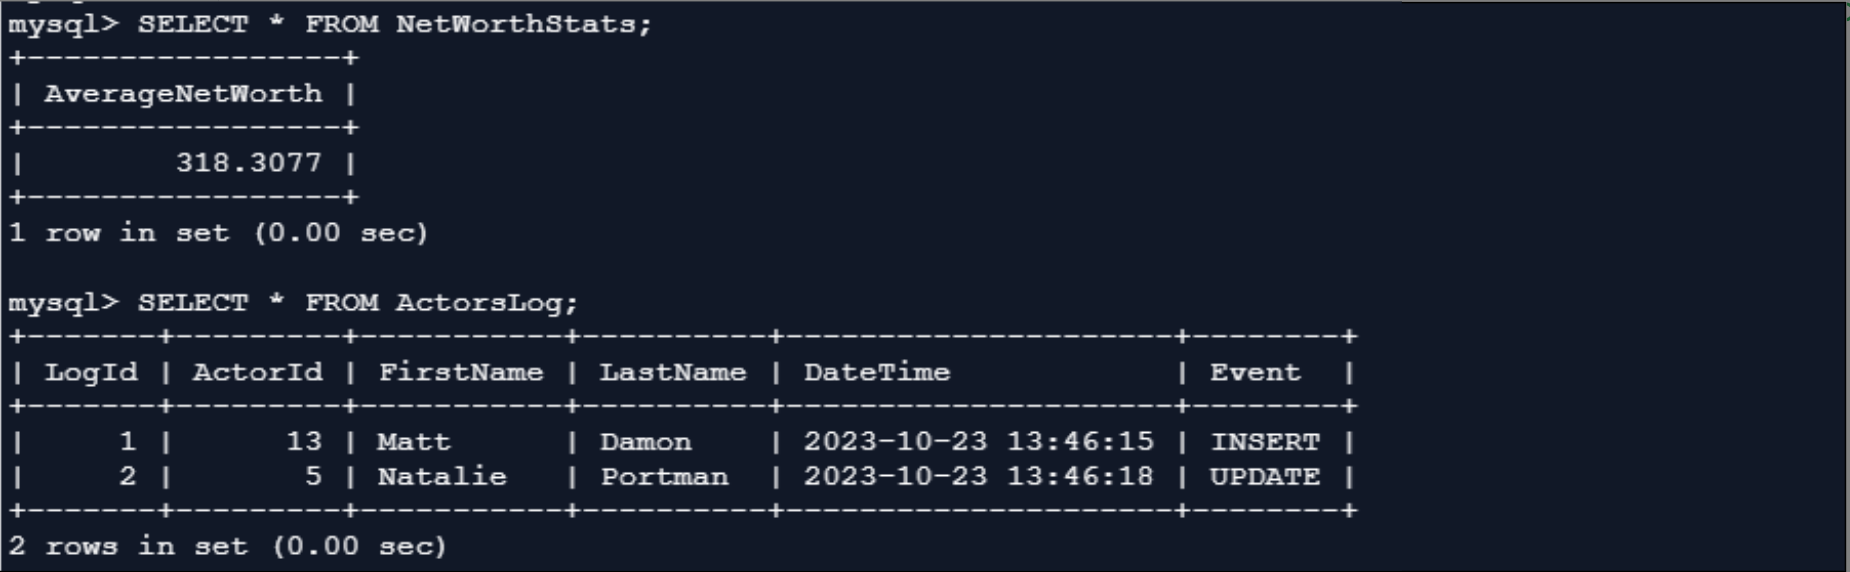

* We checked the value of **AverageNetWorth** before executing the `UPDATE` query. 
* **AfterUpdateTrigger** was fired after the update operation was successful and changed the **AverageNetWorth** as well as inserting a row in the **ActorsLog** table.

Now let’s update one more record:

```mysql
UPDATE Actors
SET MaritalStatus = 'Single'
WHERE Id = 7;

SELECT * FROM NetWorthStats;
SELECT * FROM ActorsLog;
```
This time, there is no change in the **NetWorthStats** table, but a row is inserted in the** ActorsLog** table.

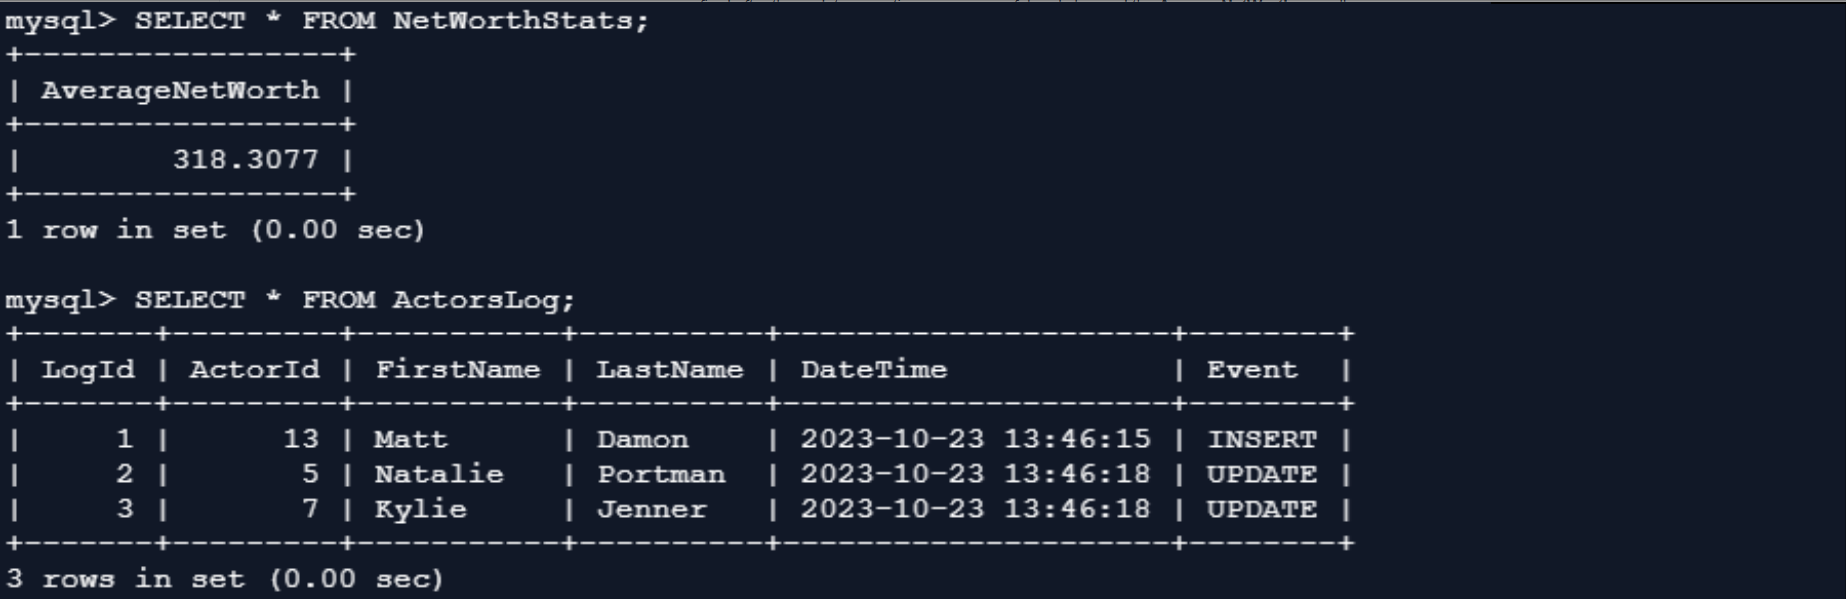



# DELETE Triggers

Delete triggers for a table are fired when a `DELETE` statement is executed. 
* Just like the insert and update triggers, delete triggers can be executed before or after a record is deleted from the table.
* Since the `DELETE` statement is meant to delete a record, the columns do not have a `NEW` value.
* Only the `OLD` value of a column is accessible, and that too cannot be updated.
* Delete triggers can be used to archive deleted records.
* In some cases, `BEFORE DELETE` triggers are used to stop an invalid delete operation. For example, if there are two tables for Course and Registration information, then it does not make sense to delete a course when there are students registered for it.
* Delete triggers can also be used to update a summary table or maintain a change log after records are removed from the table.
* Delete triggers are not available for views.

**SYNTAX**

```mysql
CREATE TRIGGER trigger_name [BEFORE | AFTER] DELETE

ON table_name

FOR EACH ROW

trigger_body
```

---

**EXAMPLE**:

* We will create a table **ActorsArchive** to store the deleted rows for later reference. 
* This table will be a copy of the **Actors** table because we want to save all information about an actor in the **Actors** table before the record gets deleted.

Here is a simple way to create a copy of an existing table:

```mysql
CREATE TABLE ActorsArchive (
    RowId INT NOT NULL AUTO_INCREMENT PRIMARY KEY, 
    DeletedAt TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP)
AS (SELECT * FROM Actors WHERE 1=2);
```

* This query will copy all the columns from the **Actors** table and add two new columns, **RowId** and **DeletedAt**. 
* The condition in the `WHERE` clause is used to restrict copying rows from the **Actors** table to the **ActorsArchive** table.
* In the absence of this WHERE clause, the new table will get populated with all the rows from the old table.

Now we will define a trigger **BeforeActorsDelete** on the **Actors** table, which will copy the record in the `DELETE` query to the **ActorsArchive** table.

```mysql
DELIMITER **

CREATE TRIGGER BeforeActorsDelete
BEFORE DELETE
ON Actors
FOR EACH ROW
BEGIN
 INSERT INTO ActorsArchive 
      (Id, Firstname, SecondName, DoB, Gender, MaritalStatus, NetWorthInMillions)
VALUES (OLD.Id, OLD.Firstname, OLD.SecondName, OLD.DoB, OLD.Gender, OLD.MaritalStatus, OLD.NetWorthInMillions);
END **

DELIMITER ;
```

The trigger has been created. 
*It will insert a new row in the **ActorArchive** table, copying all the details of the record mentioned in the `DELETE` query. 
* We do not need to specify the values for the **Id** and **DeletedAt** columns of the **ActorsArchive** table, as their default values have been mentioned at the time of creation of the table.

To test this trigger, execute the following `DELETE` query:

```mysql
DELETE FROM Actors
WHERE NetWorthInMillions < 150;
```

* Four rows match this criterion and are deleted from the **Actors** table. 
* The actor details and time of deletion are saved in the **ActorsArchive** table.

Now let’s consider an example of `AFTER DELETE` triggers using the **ActorsLog** and **NetWorthStats** tables created in the previous lessons. 
* Whenever an actor is deleted from the table, we will keep a log of this activity in the **ActorsLog** table.
* The summary table will also be updated to reflect the change in the **NetWorthInMillions** column.

The trigger **AfterActorsDelete** is defined as follows:

```mysql
DELIMITER **

CREATE TRIGGER AfterActorsDelete
AFTER DELETE ON Actors 
FOR EACH ROW
BEGIN
DECLARE TotalWorth, RowsCount INT;

INSERT INTO ActorsLog
SET ActorId = OLD.Id, FirstName = OLD.FirstName, LastName =  OLD.SecondName, DateTime = NOW(), Event = 'DELETE';
 
SELECT SUM(NetWorthInMillions) INTO TotalWorth
FROM Actors;

SELECT COUNT(*) INTO RowsCount
FROM Actors;

UPDATE NetWorthStats
SET AverageNetWorth = ((Totalworth) / (RowsCount));
END **

DELIMITER ;
```

This trigger will perform an `INSERT` in the ActorsLog table and `UPDATE` the **NetWorthStats** table. 
* We used a similar `INSERT` query in the `AFTER UPDATE` trigger in the previous lesson.
* The difference here is that `DELETE` triggers only have access to `OLD` values, while `UPDATE` triggers can access both the `NEW` and `OLD` values.

To test this trigger, we will delete a row from the **Actors** table.

```mysql
DELETE FROM Actors
WHERE Id = 13;

SELECT * FROM NetWorthStats;
SELECT * FROM ActorsLog;
```

**AfterDeleteTrigger** was fired after the `DELETE` operation was successful and changed the **AverageNetWorth** as well as inserting a row in the **ActorsLog** table.

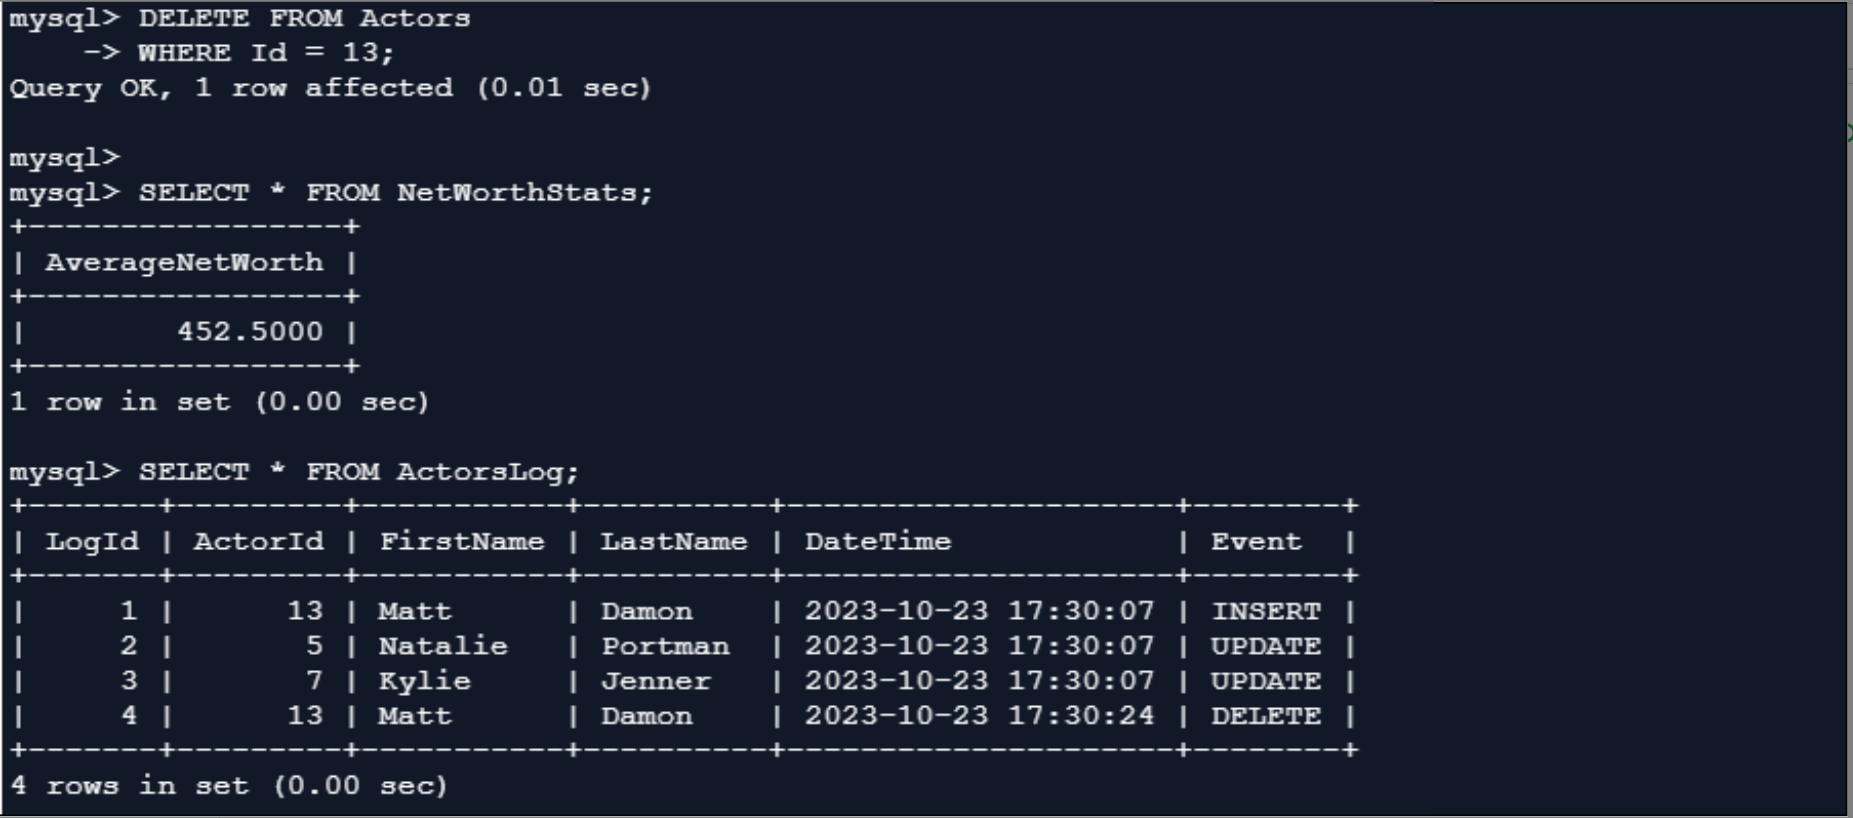

**BeforeDeleteTrigger** was also fired before the record was deleted, and a new row has been inserted in the **ActorsArchive** table.

# Multiple Triggers

* It is possible to create triggers on a table whose action time and event are the same.
* Such triggers are fired in a sequence that is specified at the time of creation of the triggers.
* The `FOLLOWS` and `PRECEDES` keywords are used to define the sequence in which triggers associated with a table having the same action time and event execute.

**SYNTAX**

```mysql
CREATE TRIGGER trigger_name [BEFORE | AFTER] [INSERT | UPDATE | DELETE]

ON table_name

[FOLLOWS | PRECEDES] existing_trigger_name

FOR EACH ROW

trigger_body
```

---

**EXAMPLE**: To demonstrate the order in which two triggers execute for the same event, we will create a simple example. 
* Suppose that we want to perform two tasks when a new record is inserted in the Actors table.
* First, based on the gender of the actor, we want to update the **GenderSummary** table.
* Second, based on his/her marital status, we want to update the **MaritalStatusSummary** table.
* We will log these actions in a separate table, **ActorsTableLog**, to show the order of execution of triggers. 

To create these tables, execute the following queries:

```mysql
CREATE TABLE GenderSummary (
TotalMales INT NOT NULL,
TotalFemales INT NOT NULL
);

CREATE TABLE MaritalStatusSummary (
TotalSingle INT NOT NULL,
TotalMarried INT NOT NULL,
TotalDivorced INT NOT NULL
);

CREATE TABLE ActorsTableLog (
RowId INT AUTO_INCREMENT PRIMARY KEY,
ActorId INT NOT NULL,
Detail VARCHAR(100) NOT NULL,
UpdatedOn TIMESTAMP NOT NULL DEFAULT CURRENT_TIMESTAMP
);
```

Now run the following queries to enter data in the tables:

```mysql
INSERT INTO GenderSummary (TotalMales, TotalFemales) 
Values ((SELECT COUNT(Gender) FROM Actors WHERE Gender = 'Male'),
     (SELECT COUNT(Gender) FROM Actors WHERE Gender = 'Female'));

SELECT * FROM GenderSummary;

INSERT INTO MaritalStatusSummary (TotalSingle, TotalMarried, TotalDivorced) 
Values ((SELECT COUNT(MaritalStatus) FROM Actors WHERE MaritalStatus = 'Single'),
     (SELECT COUNT(MaritalStatus) FROM Actors WHERE MaritalStatus = 'Married'),
     (SELECT COUNT(MaritalStatus) FROM Actors WHERE MaritalStatus = 'Divorced'));

SELECT * FROM MaritalStatusSummary;
```

Now we will create the first trigger that updates **GenderSummary** table after a row is inserted in the **Actors** table as follows:

```mysql
DELIMITER **

CREATE TRIGGER UpdateGenderSummary
AFTER INSERT
ON Actors 
FOR EACH ROW
BEGIN

DECLARE count INT;

IF NEW.Gender = 'Male' THEN
 UPDATE GenderSummary
SET TotalMales = TotalMales+1;

INSERT INTO ActorsTableLog (ActorId, Detail) 
VALUES (NEW.Id, 'TotalMales value of GenderSummary table changed.');

ELSE  
UPDATE GenderSummary
SET TotalFemales = TotalFemales+1;

INSERT INTO ActorsTableLog (ActorId, Detail) 
VALUES (NEW.Id, 'TotalFemales value of GenderSummary table changed.');

END IF;
END  **

DELIMITER ;
```

* In this trigger, we first check the **Gender** of the newly inserted actor and increment the **TotalMales** or **TotalFemales** value accordingly.
* Then a row is inserted in the **ActorsTableLog** which describes which value in the **GenderSummary** table was changed.

Next, we will create another trigger **UpdateMaritalStatusSummary** that will execute after the **UpdateGenderSummary** trigger as follows:

```mysql
DELIMITER **

CREATE TRIGGER UpdateMaritalStatusSummary
AFTER INSERT
ON Actors 
FOR EACH ROW
FOLLOWS UpdateGenderSummary

BEGIN

DECLARE count INT;

IF NEW.MaritalStatus = 'Single' THEN
 UPDATE MaritalStatusSummary
SET TotalSingle = TotalSingle+1;

INSERT INTO ActorsTableLog (ActorId, Detail) 
VALUES (NEW.Id, 'TotalSingle value of MaritalStatusSummary table changed.');

ELSEIF  NEW.MaritalStatus = 'Married' THEN
 UPDATE MaritalStatusSummary
SET TotalMarried = TotalMarried+1;

INSERT INTO ActorsTableLog (ActorId, Detail) 
VALUES (NEW.Id, 'TotalMarried value of MaritalStatusSummary table changed.');

ELSE
UPDATE MaritalStatusSummary
SET TotalDivorced = TotalDivorced+1;

INSERT INTO ActorsTableLog (ActorId, Detail) 
VALUES (NEW.Id, 'TotalDivorced value of MaritalStatusSummary table changed.');

END IF;
END  **

DELIMITER ;
```

The `FOLLOWS` keyword is used to define the order of execution of the trigger to be after the **UpdateGenderSummary** trigger.

* In this trigger, `IF THEN ELSEIF ELSE` statements are used to check the **MaritalStatus** of the newly inserted actor, and the corresponding value in the **MaritalStatusSummary** table is updated.
* Then a row is inserted in the **ActorsTableLog** which describes which value in the **MaritalStatusSummary** table was changed.

Both triggers are associated with the same event `AFTER INSERT ON ACTORS`. 

To test if the triggers are executed in the order defined, we will insert a row in the **Actors** table and then check the **ActorsTableLog** table.

```mysql
INSERT INTO Actors (FirstName, SecondName, DoB, Gender, MaritalStatus,  NetWorthInMillions) 
VALUES ('Tom', 'Hanks', '1956-07-09', 'Male', 'Married', 350);

SELECT * FROM ActorsTableLog;
```

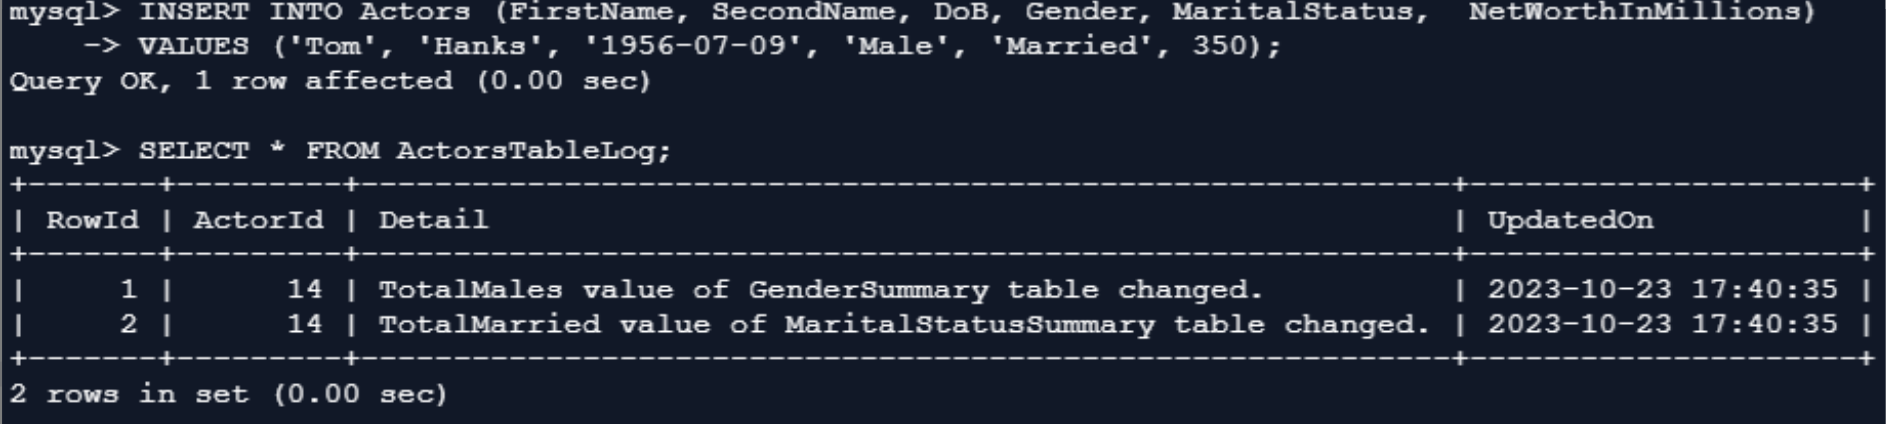

* The **UpdateGenderSummary** trigger executes first, and a row is inserted in the table. 
* Then the **UpdateMaritalStatusSummary** trigger runs and inserts a row in the **ActorsTableLog**.

The `SHOW TRIGGERS` statement is used to display the triggers in the database.

```mysql
SHOW TRIGGERS;
```

* This statement does not return any information on the order of execution of triggers if a table has multiple triggers associated with the same event. 
* That information is stored in the triggers table in the **information_schema** database. 

Use the following query to display the relevant column of the table:

```mysql
SELECT
 trigger_name,
 action_order
FROM
 information_schema.triggers
WHERE
 trigger_schema = 'MovieIndustry';
```

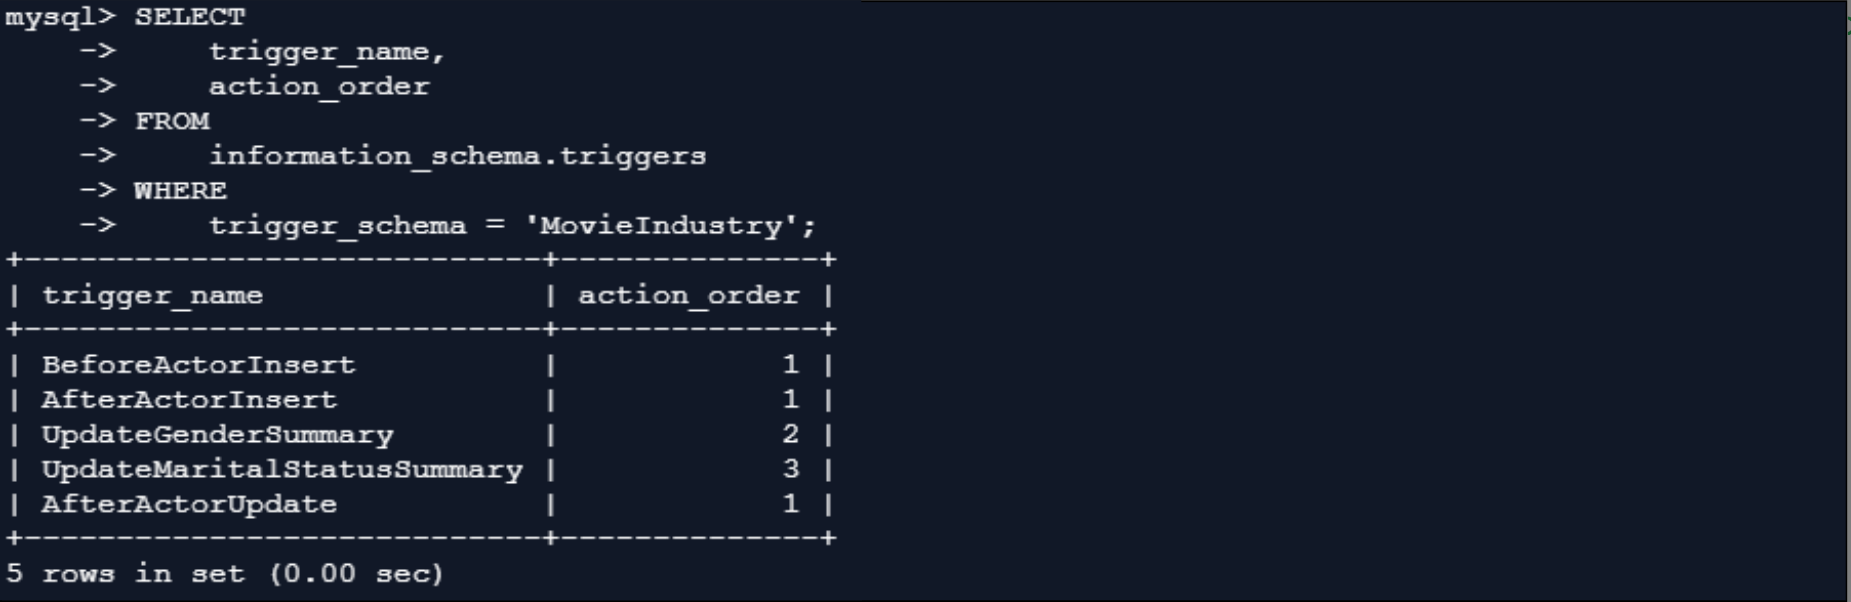